# Result access API demo

Han Hou 02/2025

In [12]:
%load_ext autoreload
%autoreload 2

import logging
logging.basicConfig(level=logging.INFO)

import pandas as pd

from aind_analysis_arch_result_access import get_mle_model_fitting
from aind_analysis_arch_result_access.han_pipeline import get_session_table, get_logistic_regression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Get the master session table (same as in Streamlit, updated daily)

In [10]:
df_master = get_session_table(if_load_bpod=False)

INFO:aind_analysis_arch_result_access.han_pipeline:Loading session table from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...


INFO:aind_analysis_arch_result_access.han_pipeline:Loading mouse PI mapping from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...
INFO:aind_analysis_arch_result_access.han_pipeline:Post-hoc processing...


In [11]:
df_master.shape

(7609, 148)

In [12]:
df_master.head()

,subject_id,session_date,nwb_suffix,session,rig,trainer,PI,curriculum_name,curriculum_version,current_stage_actual,...,abs(bias_naive),abs(logistic_Su2022_bias),abs(logistic_Bari2019_bias),abs(logistic_Hattori2019_bias),abs(logistic_Miller2021_bias),weekday,avg_trial_length_in_seconds,water_day_total_last_session,water_after_session_last_session,curriculum_version_group
0,769253,2025-03-12,185318,32.0,446-8-D,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,GRADUATED,...,0.163972,0.244651,0.183107,0.180300,0.130287,3,10.344828,NaN,NaN,v3
1,765628,2025-03-12,185051,10.0,446-8-C,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,STAGE_FINAL,...,0.347932,0.249706,0.186309,0.190249,0.265820,3,10.563380,NaN,NaN,v3
2,765062,2025-03-12,184659,23.0,446-7-D,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,GRADUATED,...,0.039848,0.000998,0.003768,0.003553,0.012560,3,9.255898,NaN,NaN,v3
3,765626,2025-03-12,183921,10.0,446-7-C,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,STAGE_FINAL,...,0.193858,0.140964,0.136131,0.198543,0.162198,3,8.604207,NaN,NaN,v3
4,770772,2025-03-12,183710,32.0,446-7-A,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,STAGE_FINAL,...,0.272727,0.210806,0.194899,0.196089,0.234781,3,9.285714,NaN,NaN,v3


In [13]:
print(df_master.columns)

Index(['subject_id', 'session_date', 'nwb_suffix', 'session', 'rig', 'trainer',
       'PI', 'curriculum_name', 'curriculum_version', 'current_stage_actual',
       ...
       'abs(bias_naive)', 'abs(logistic_Su2022_bias)',
       'abs(logistic_Bari2019_bias)', 'abs(logistic_Hattori2019_bias)',
       'abs(logistic_Miller2021_bias)', 'weekday',
       'avg_trial_length_in_seconds', 'water_day_total_last_session',
       'water_after_session_last_session', 'curriculum_version_group'],
      dtype='object', length=148)


## 2. Get logistic regression results

In [6]:
from aind_analysis_arch_result_access.han_pipeline import get_logistic_regression

Get one session

In [31]:
df_logistic = get_logistic_regression(
    df_sessions=pd.DataFrame(
        {
            "subject_id": ["769253"],
            "session_date": ["2025-03-12"],
        }
    ),
    model="Su2022",
    if_download_figures=False,
)
df_logistic

INFO:aind_analysis_arch_result_access.han_pipeline:Loading session table from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...


INFO:aind_analysis_arch_result_access.han_pipeline:Loading mouse PI mapping from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...
INFO:aind_analysis_arch_result_access.han_pipeline:Post-hoc processing...
Get logistic regression betas from s3: 100%|██████████| 1/1 [00:00<00:00, 19.52it/s]
INFO:aind_analysis_arch_result_access.han_pipeline:Successfully retrieved logistic regression betas from 1 / 1 sessions.


subject_id session_date nwb_suffix      RewC                               \
                                            15        14        13       12   
0     769253   2025-03-12     185318  0.167723  0.012139 -0.002052 -0.25395   

                                 ...      UnrC                bias  \
         11        10         9  ...         2         1       NaN   
0  0.030127 -0.036445  0.077883  ...  0.295642  0.633673 -0.244651   

  logistic_Su2022_RewC_amp logistic_Su2022_RewC_tau logistic_Su2022_UnrC_amp  \
                       NaN                      NaN                      NaN   
0                 1.821531                    1.651                 1.230054   

  logistic_Su2022_UnrC_tau logistic_Su2022_bias logistic_Su2022_score_mean  \
                       NaN                  NaN                        NaN   
0                 1.512642            -0.244651                     0.8018   

  logistic_Su2022_score_std  
                        NaN  
0                  0.103951  

[1 rows x 41 columns]

Get beta coefficients

In [40]:
# Rewarded choice (of "N" trials back)
df_logistic.RewC

,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
0,0.167723,0.012139,-0.002052,-0.25395,0.030127,-0.036445,0.077883,0.018846,0.235873,0.001608,0.174253,0.037561,0.369203,0.475439,1.01776


In [44]:
df_logistic.bias

,NaN
0,-0.244651


Get sessions in batch

In [19]:
df_logistic = get_logistic_regression(
    df_master.query("subject_id == '769253'"),  # All sessions from a single subject
    model="Su2022",
    if_download_figures=True,
    download_path="./tmp",
)
df_logistic.head()

INFO:aind_analysis_arch_result_access.han_pipeline:Loading session table from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...


INFO:aind_analysis_arch_result_access.han_pipeline:Loading mouse PI mapping from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...
INFO:aind_analysis_arch_result_access.han_pipeline:Post-hoc processing...
Get logistic regression betas from s3: 100%|██████████| 32/32 [00:00<00:00, 143.71it/s]
INFO:aind_analysis_arch_result_access.han_pipeline:Successfully retrieved logistic regression betas from 32 / 32 sessions.
Download logistic regression figures from s3 to ./tmp: 100%|██████████| 32/32 [00:00<00:00, 145.16it/s]


subject_id session_date nwb_suffix      RewC                                \
                                            15        14        13        12   
0     769253   2025-03-12     185318  0.167723  0.012139 -0.002052 -0.253950   
1     769253   2025-03-11     190030  0.025625  0.047670  0.161796 -0.086204   
2     769253   2025-03-10     184446  0.037325  0.247840 -0.154823 -0.118705   
3     769253   2025-03-09     165658  0.378673 -0.194260  0.316576  0.084161   
4     769253   2025-03-08     152809 -0.151415 -0.159483  0.037031  0.274597   

                                 ...      UnrC                bias  \
         11        10         9  ...         2         1       NaN   
0  0.030127 -0.036445  0.077883  ...  0.295642  0.633673 -0.244651   
1 -0.111452 -0.097525  0.283025  ...  0.348142  1.258292 -0.304800   
2  0.051891 -0.236636  0.218261  ...  0.333327  0.933549 -0.315339   
3  0.244472 -0.116015  0.260305  ...  0.335681  1.202152 -1.011302   
4 -0.250572 -0.007435  0.429764  ...  0.400790  1.183173 -0.141353   

  logistic_Su2022_RewC_amp logistic_Su2022_RewC_tau logistic_Su2022_UnrC_amp  \
                       NaN                      NaN                      NaN   
0                 1.821531                 1.651000                 1.230054   
1                 1.750562                 2.231787                 2.788863   
2                 2.911735                 1.528812                 2.440033   
3                 3.303574                 1.564935                 5.453295   
4                 3.395440                 1.336549                 3.270407   

  logistic_Su2022_UnrC_tau logistic_Su2022_bias logistic_Su2022_score_mean  \
                       NaN                  NaN                        NaN   
0                 1.512642            -0.244651                   0.801800   
1                 1.196970            -0.304800                   0.847387   
2                 1.031706            -0.315339                   0.881314   
3                 0.664322            -1.011302                   0.932971   
4                 0.972250            -0.141353                   0.900871   

  logistic_Su2022_score_std  
                        NaN  
0                  0.103951  
1                  0.112093  
2                  0.082592  
3                  0.065187  
4                  0.083249  

[5 rows x 41 columns]

In [25]:
import os
fig_downloaded = os.listdir("./tmp")
fig_downloaded[:10]

['765628_2025-03-12_185051_logistic_regression_Su2022.png',
 '758018_2025-03-12_143816_logistic_regression_Su2022.png',
 '765626_2025-03-12_183921_logistic_regression_Su2022.png',
 '770772_2025-03-12_183710_logistic_regression_Su2022.png',
 '765232_2025-03-12_182618_logistic_regression_Su2022.png',
 '778232_2025-03-12_134042_logistic_regression_Su2022.png',
 '765062_2025-03-12_184659_logistic_regression_Su2022.png',
 '769253_2025-03-12_185318_logistic_regression_Su2022.png',
 '786845_2025-03-12_164419_logistic_regression_Su2022.png',
 '770528_2025-03-12_164306_logistic_regression_Su2022.png']

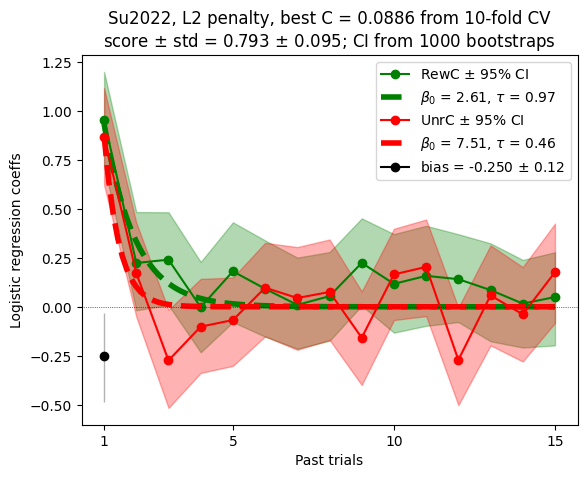

In [28]:
# Show one png
from IPython.display import Image
Image(f"./tmp/{fig_downloaded[0]}")

## 3. Get RL fitting results

In [37]:
from aind_analysis_arch_result_access import get_mle_model_fitting
df = get_mle_model_fitting(subject_id="730945", session_date="2024-10-24")

print(df.columns)
print(df[["agent_alias", "n_trials", "AIC", "latent_variables", "pipeline_source"]])

Querying AIND Analysis Framework: {'processing.data_processes.code.parameters.analysis_name': 'MLE fitting', 'processing.data_processes.code.parameters.analysis_tag': 'aind-analysis-framework v0.1', 'processing.data_processes.output_parameters.subject_id': '730945', 'processing.data_processes.output_parameters.session_date': '2024-10-24'}
Querying Han's prototype analysis pipeline: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '730945', 'session_date': '2024-10-24'}
No records in AIND Analysis Framework
Found 9 records in Han's prototype analysis pipeline
Total: 9 MLE fitting records!
--- After filtering for successful fittings: 9 records (0 skipped) ---
--- After filtering for most recent versions: 9 records  ---
    AIND Analysis Framework: 0
    Han's prototype analysis pipeline: 9


Get latent variables from s3: 100%|██████████| 9/9 [00:00<00:00, 36.73it/s]

Index(['_id', 'nwb_name', 'session_date', 'status', 'subject_id',
       'analysis_time', 'agent_alias', 'n_trials', 'log_likelihood',
       'prediction_accuracy', 'k_model', 'AIC', 'BIC', 'LPT', 'LPT_AIC',
       'LPT_BIC', 'params', 'prediction_accuracy_test',
       'prediction_accuracy_fit', 'prediction_accuracy_test_bias_only',
       'pipeline_source', 'S3_location', 'latent_variables', 'qvalue_spread'],
      dtype='object')
                     agent_alias  n_trials          AIC  \
0  QLearning_L1F0_CKfull_softmax       394   241.922187   
1  QLearning_L1F1_CKfull_softmax       394   238.848589   
2       ForagingCompareThreshold       394   242.957376   
3  QLearning_L2F1_CKfull_softmax       394   238.265381   
4     QLearning_L2F1_CK1_softmax       394   236.265381   
5                           WSLS       394  4051.958064   
6            QLearning_L1F0_epsi       394   403.621460   
7         QLearning_L2F1_softmax       394   236.512476   
8     QLearning_L1F1_CK1_softmax

In [3]:
df

,_id,nwb_name,session_date,status,subject_id,analysis_time,agent_alias,n_trials,log_likelihood,prediction_accuracy,...,LPT_AIC,LPT_BIC,params,prediction_accuracy_test,prediction_accuracy_fit,prediction_accuracy_test_bias_only,pipeline_source,S3_location,latent_variables,qvalue_spread
0,2f5286f2571ec410a55d22dda2fd425185262a157e0c48...,730945_2024-10-24_17-38-06.nwb,2024-10-24,success,730945,2026-01-08T07:39:40.883131,QLearning_L1F0_CKfull_softmax,394,-115.961093,0.898477,...,0.735645,0.717316,"{'learn_rate': 0.3456277140455428, 'choice_ker...",NaN,NaN,NaN,han's analysis pipeline,s3://aind-dynamic-foraging-analysis-prod-o5171...,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.874524
1,92ea778a8f810de5d289122833bade8dc0c4cfe22463f1...,730945_2024-10-24_17-38-06.nwb,2024-10-24,success,730945,2026-01-08T02:02:31.035234,QLearning_L1F1_CKfull_softmax,394,-113.424295,0.906091,...,0.738520,0.716495,"{'learn_rate': 0.9267090053140433, 'forget_rat...",NaN,NaN,NaN,han's analysis pipeline,s3://aind-dynamic-foraging-analysis-prod-o5171...,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.418929
2,bf2079bc1bccaca75e607783563f59924c144fedbb3eee...,730945_2024-10-24_17-38-06.nwb,2024-10-24,success,730945,2025-06-18T19:45:36.292057,ForagingCompareThreshold,394,-117.478688,0.895939,...,0.734679,0.719999,"{'learn_rate': 0.37764375674457296, 'threshold...","[0.8461538461538461, 0.8974358974358975, 0.923...","[0.9014084507042254, 0.895774647887324, 0.8929...","[0.7435897435897436, 0.6666666666666666, 0.487...",han's analysis pipeline,s3://aind-dynamic-foraging-analysis-prod-o5171...,"{'value': [-0.41527359679581904, -0.2584481156...",NaN
3,19296d3a37db1e582552dd73b8f78333e435863b419d72...,730945_2024-10-24_17-38-06.nwb,2024-10-24,success,730945,2025-06-05T11:33:32.214370,QLearning_L2F1_CKfull_softmax,394,-112.132691,0.903553,...,0.739067,0.713416,"{'learn_rate_rew': 0.7197512613020202, 'learn_...","[0.9487179487179487, 0.8205128205128205, 0.974...","[0.8985915492957747, 0.9098591549295775, 0.895...","[0.717948717948718, 0.5897435897435898, 0.6410...",han's analysis pipeline,s3://aind-dynamic-foraging-analysis-prod-o5171...,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.867662
4,5ce7f1f816c29a36a10b08af61d207ea3e42d8056969ce...,730945_2024-10-24_17-38-06.nwb,2024-10-24,success,730945,2025-01-22T00:05:31.954583,QLearning_L2F1_CK1_softmax,394,-112.132691,0.903553,...,0.740945,0.718848,"{'learn_rate_rew': 0.7197684248796569, 'learn_...","[0.8717948717948718, 0.9230769230769231, 0.974...","[0.9070422535211268, 0.9014084507042254, 0.895...","[0.6923076923076923, 0.6666666666666666, 0.666...",han's analysis pipeline,s3://aind-dynamic-foraging-analysis-prod-o5171...,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.867662
5,7c61d01e0f9d35e7d0bc7db4b58b82be433e24a000f688...,730945_2024-10-24_17-38-06.nwb,2024-10-24,success,730945,2024-11-27T00:38:19.969255,WSLS,394,-2024.979032,0.637056,...,0.005846,0.005816,"{'biasL': 0.5727699869732825, 'loss_count_thre...","[0.6410256410256411, 0.717948717948718, 0.6153...","[0.6366197183098592, 0.6281690140845071, 0.639...","[0.6410256410256411, 0.717948717948718, 0.6153...",han's analysis pipeline,s3://aind-dynamic-foraging-analysis-prod-o5171...,"{'loss_count': [0.0, 1.0, 0.0, 1.0, 2.0, 0.0, ...",NaN
6,58cc5b6f6eb10ff9c267e3fc6da2b227c399c792cebdfd...,730945_2024-10-24_17-38-06.nwb,2024-10-24,success,730945,2024-11-26T22:45:05.653842,QLearning_L1F0_epsi,394,-198.810730,0.796954,...,0.599170,0.590168,"{'learn_rate': 0.24762763981555647, 'biasL': 0...","[0.8205128205128205, 0.7692307692307693, 0.769...","[0.7830985915492957, 0.7887323943661971, 0.785...","[0.5897435897435898, 0.6666666666666666, 0.641...",han's analysis pipeline,s3://aind-dynamic-foraging-analysis-prod-o5171...,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.884578
7,ec59be40c0391faa208836a74915452157d694088fff6b...,730945_2024-10-24_17-38-06.nwb,2024-10-24,success,730945,2024-11-26T22:10:08.628471,QLearning_L2F1_softmax,394,

Also download figures

In [38]:
df = get_mle_model_fitting(
    subject_id="730945",
    session_date="2024-10-24",
    if_download_figures=True,
    download_path="./mle_figures",
)
!ls ./mle_figures

Querying AIND Analysis Framework: {'processing.data_processes.code.parameters.analysis_name': 'MLE fitting', 'processing.data_processes.code.parameters.analysis_tag': 'aind-analysis-framework v0.1', 'processing.data_processes.output_parameters.subject_id': '730945', 'processing.data_processes.output_parameters.session_date': '2024-10-24'}
Querying Han's prototype analysis pipeline: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '730945', 'session_date': '2024-10-24'}
No records in AIND Analysis Framework
Found 9 records in Han's prototype analysis pipeline
Total: 9 MLE fitting records!
--- After filtering for successful fittings: 9 records (0 skipped) ---
--- After filtering for most recent versions: 9 records  ---
    AIND Analysis Framework: 0
    Han's prototype analysis pipeline: 9


Download figures from s3: 100%|██████████| 9/9 [00:00<00:00, 43.35it/s]


730945_2024-10-24_17-38-06_ForagingCompareThreshold_bf2079bc1b.png
730945_2024-10-24_17-38-06_QLearning_L1F0_CKfull_softmax_2f5286f257.png
730945_2024-10-24_17-38-06_QLearning_L1F0_epsi_58cc5b6f6e.png
730945_2024-10-24_17-38-06_QLearning_L1F1_CK1_softmax_3ffdf98012.png
730945_2024-10-24_17-38-06_QLearning_L1F1_CKfull_softmax_92ea778a8f.png
730945_2024-10-24_17-38-06_QLearning_L2F1_CK1_softmax_5ce7f1f816.png
730945_2024-10-24_17-38-06_QLearning_L2F1_CKfull_softmax_19296d3a37.png
730945_2024-10-24_17-38-06_QLearning_L2F1_softmax_ec59be40c0.png
730945_2024-10-24_17-38-06_WSLS_7c61d01e0f.png


Get fittings from all sessions of a mouse for a specific model


In [39]:
df = get_mle_model_fitting(
    subject_id="730945",
    agent_alias="QLearning_L2F1_CK1_softmax",
    if_download_figures=False,
)
print(df.iloc[:10][["nwb_name", "agent_alias"]])

Querying AIND Analysis Framework: {'processing.data_processes.code.parameters.analysis_name': 'MLE fitting', 'processing.data_processes.code.parameters.analysis_tag': 'aind-analysis-framework v0.1', 'processing.data_processes.output_parameters.subject_id': '730945', 'processing.data_processes.output_parameters.fit_settings.agent_alias': 'QLearning_L2F1_CK1_softmax'}
Querying Han's prototype analysis pipeline: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '730945', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CK1_softmax'}
No records in AIND Analysis Framework
Found 32 records in Han's prototype analysis pipeline
Total: 32 MLE fitting records!
--- After filtering for successful fittings: 32 records (0 skipped) ---
--- After filtering for most recent versions: 32 records  ---
    AIND Analysis Framework: 0
    Han's prototype analysis pipeline: 32


Get latent variables from s3: 100%|██████████| 32/32 [00:00<00:00, 43.92it/s]

                         nwb_name                 agent_alias
0  730945_2024-10-23_15-33-07.nwb  QLearning_L2F1_CK1_softmax
1  730945_2024-10-24_17-38-06.nwb  QLearning_L2F1_CK1_softmax
2  730945_2024-10-18_18-27-32.nwb  QLearning_L2F1_CK1_softmax
3  730945_2024-10-21_14-41-07.nwb  QLearning_L2F1_CK1_softmax
4  730945_2024-10-17_16-03-09.nwb  QLearning_L2F1_CK1_softmax
5  730945_2024-10-04_15-04-02.nwb  QLearning_L2F1_CK1_softmax
6  730945_2024-10-15_15-09-36.nwb  QLearning_L2F1_CK1_softmax
7  730945_2024-10-22_15-49-30.nwb  QLearning_L2F1_CK1_softmax
8  730945_2024-10-16_16-08-27.nwb  QLearning_L2F1_CK1_softmax
9  730945_2024-09-09_16-22-52.nwb  QLearning_L2F1_CK1_softmax


(for advanced users) Use your own docDB query

In [40]:
df = get_mle_model_fitting(
    from_custom_query={
        "analysis_results.fit_settings.agent_alias": "QLearning_L2F1_CK1_softmax",
        "analysis_results.n_trials" : {"$gt": 600},
    },
    if_include_latent_variables=False,
    if_download_figures=False,
)

Querying AIND Analysis Framework: {'processing.data_processes.code.parameters.analysis_name': 'MLE fitting', 'processing.data_processes.code.parameters.analysis_tag': 'aind-analysis-framework v0.1', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CK1_softmax', 'analysis_results.n_trials': {'$gt': 600}}
Querying Han's prototype analysis pipeline: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CK1_softmax', 'analysis_results.n_trials': {'$gt': 600}}
No records in AIND Analysis Framework
Found 807 records in Han's prototype analysis pipeline
Total: 807 MLE fitting records!
--- After filtering for successful fittings: 807 records (0 skipped) ---
--- After filtering for most recent versions: 807 records  ---
    AIND Analysis Framework: 0
    Han's prototype analysis pipeline: 807


In [7]:
df.shape

(807, 22)

In [36]:
df = get_mle_model_fitting(
    session_date="2025-03-21",
    if_include_metrics=False,
    if_include_latent_variables=True,
    if_download_figures=False,
    download_path="./model_fitting"
)

Querying AIND Analysis Framework: {'processing.data_processes.code.parameters.analysis_name': 'MLE fitting', 'processing.data_processes.code.parameters.analysis_tag': 'aind-analysis-framework v0.1', 'processing.data_processes.output_parameters.session_date': '2025-03-21'}
Querying Han's prototype analysis pipeline: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'session_date': '2025-03-21'}
No records in AIND Analysis Framework
Found 320 records in Han's prototype analysis pipeline
Total: 320 MLE fitting records!
--- After filtering for successful fittings: 304 records (16 skipped) ---
--- After filtering for most recent versions: 304 records  ---
    AIND Analysis Framework: 0
    Han's prototype analysis pipeline: 304


Get latent variables from s3: 100%|██████████| 304/304 [00:04<00:00, 63.18it/s]


### Fetch analyses generated by the AIND Analysis Framework

By default, the API fetches only the most recent analysis version per {nwb, model} pair (`only_recent_version=True`). If there are analyses from the AIND Analysis Framework as well as from Han's old pipeline, only the analyses from the AIND Analysis Framework will be returned.

In [35]:
df = get_mle_model_fitting(
    subject_id="778869",
    session_date="2025-07-26",
)
df[["nwb_name", "CO_asset_id", "agent_alias", "pipeline_source"]]

Querying AIND Analysis Framework: {'processing.data_processes.code.parameters.analysis_name': 'MLE fitting', 'processing.data_processes.code.parameters.analysis_tag': 'aind-analysis-framework v0.1', 'processing.data_processes.output_parameters.subject_id': '778869', 'processing.data_processes.output_parameters.session_date': '2025-07-26'}
Querying Han's prototype analysis pipeline: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '778869', 'session_date': '2025-07-26'}
Found 8 records in AIND Analysis Framework
Found 12 records in Han's prototype analysis pipeline
Total: 20 MLE fitting records!
--- After filtering for successful fittings: 14 records (6 skipped) ---
--- After filtering for most recent versions: 8 records  ---
    AIND Analysis Framework: 8
    Han's prototype analysis pipeline: 0


Get latent variables from s3: 100%|██████████| 8/8 [00:00<00:00, 33.40it/s]


,nwb_name,CO_asset_id,agent_alias,pipeline_source
0,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,ForagingCompareThreshold,aind analysis framework
1,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L2F1_CKfull_softmax,aind analysis framework
2,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L1F0_CKfull_softmax,aind analysis framework
3,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,WSLS,aind analysis framework
4,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L1F1_CKfull_softmax,aind analysis framework
5,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L1F0_epsi,aind analysis framework
6,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L2F1_softmax,aind analysis framework
7,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L1F1_CK1_softmax,aind analysis framework


In [24]:
df = get_mle_model_fitting(
    subject_id="778869",
    session_date="2025-07-26",
    only_recent_version=False,  # Get all analysis versions
)
df[["nwb_name", "CO_asset_id", "agent_alias", "pipeline_source"]]

Querying AIND Analysis Framework: {'processing.data_processes.code.parameters.analysis_name': 'MLE fitting', 'processing.data_processes.code.parameters.analysis_tag': 'aind-analysis-framework v0.1', 'processing.data_processes.output_parameters.subject_id': '778869', 'processing.data_processes.output_parameters.session_date': '2025-07-26'}
Querying Han's prototype analysis pipeline: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '778869', 'session_date': '2025-07-26'}
Found 8 records in AIND Analysis Framework
Found 12 records in Han's prototype analysis pipeline
Total: 20 MLE fitting records!
--- After filtering for successful fittings: 14 records (6 skipped) ---
         You should check the nwb_name, n_trials, or pipeline_source
         to select the ones you want.


Get latent variables from s3: 100%|██████████| 14/14 [00:00<00:00, 36.75it/s]


,nwb_name,CO_asset_id,agent_alias,pipeline_source
0,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,WSLS,aind analysis framework
1,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L1F1_CKfull_softmax,aind analysis framework
2,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L1F0_CKfull_softmax,aind analysis framework
3,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L1F0_epsi,aind analysis framework
4,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,ForagingCompareThreshold,aind analysis framework
5,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L2F1_softmax,aind analysis framework
6,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L1F1_CK1_softmax,aind analysis framework
7,behavior_778869_2025-07-26_20-42-41.nwb,[s3://codeocean-s3datasetsbucket-1u41qdg42ur9/...,QLearning_L2F1_CKfull_softmax,aind analysis framework
8,behavior_778869_2025-07-26_20-42-41.nwb,NaN,WSLS,han's analysis pipeline
9,behavior_778869_2025-07-26_20-42-41.nwb,NaN,QLearning_L2F1_softmax,han's analysis pipeline


Note that we get 8 records from the AIND Analysis Framework and 12 records from Han's old pipeline.

To verify that fitting results from the two pipelines are very close to each other:

In [30]:
df.query("agent_alias == 'QLearning_L2F1_softmax'")[
    ["nwb_name", "agent_alias", "LPT", "params", "pipeline_source"]
]

,nwb_name,agent_alias,LPT,params,pipeline_source
5,behavior_778869_2025-07-26_20-42-41.nwb,QLearning_L2F1_softmax,0.659886,"{'learn_rate_rew': 0.7351551390867447, 'learn_...",aind analysis framework
9,behavior_778869_2025-07-26_20-42-41.nwb,QLearning_L2F1_softmax,0.659886,"{'learn_rate_rew': 0.7347381592928388, 'learn_...",han's analysis pipeline
